In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [52]:
train_data = pd.read_csv('../input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Quantitative description

In [53]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Qualitative description

In [54]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Penasco y Castellana, Mr. Victor de Satode",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


From the above, we can tell that the column '**Survived**'has only two values 0 and 1. 0 being that the passenger died and 1 being that the passenger survived.

In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have **891** training sets but Age column has **714** values, the remaining **177** are missing, for this reason we won't be using ages as a criteria for our prediction. Same applies to Cabin column

## Correlation

In [56]:
train_age_surv_corr = train_data['Age'].corr(train_data['Survived'])
train_class_surv_corr = train_data['Pclass'].corr(train_data['Survived'])

train_age_surv_corr

-0.07722109457217768

In [57]:
train_class_surv_corr

-0.33848103596101475

In [58]:
train_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Looking into the fields, column by column. Starting with 'Sex'

In [59]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### From the above, we can see that there were more men on the ship than women. 

In [60]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Visualization of the data with respect to the percentage of male to female that survived

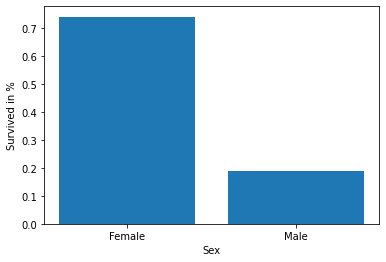

In [61]:
x_axis = ['Female', 'Male']
y_axis = [0.74, 0.19]

plt.bar(x=x_axis, height=y_axis)
plt.xlabel('Sex')
plt.ylabel('Survived in %')
plt.show()

In [62]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [63]:
survived = train_data[train_data['Survived'] == 1]
died = train_data[train_data['Survived'] == 0]

print(len(survived))
print(len(died))

342
549


In [64]:
surv_per = float(round((len(survived)/len(train_data))*100.0))
died_per = float(round((len(died)/len(train_data))*100.0))
print ("Survived: ", str(surv_per), "%")
print ("Died: ", str(died_per), "%")

Survived:  38.0 %
Died:  62.0 %


### We can also see that 549 of the passengers died, which is more than half of the passengers on board. 

In [65]:
train_data['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

### More people had the class 3 ticket and fewer passengers had the class 2 ticket.

In [66]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### More than half of passengers with class 1 tickets died, almost half of class 2 passengers died and very few of class 3 passengers died.

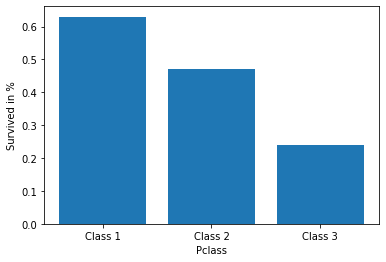

In [67]:
x_axis = ['Class 1', 'Class 2', 'Class 3']
y_axis = [0.63, 0.47, 0.24]

plt.bar(x=x_axis, height=y_axis)
plt.xlabel('Pclass')
plt.ylabel('Survived in %')
plt.show()

In [68]:
all_three = pd.crosstab(train_data['Pclass'], train_data['Sex'])
print(all_three)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0.5, 0, 'Percentage')

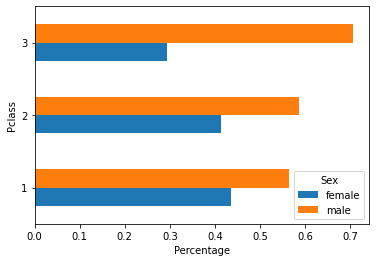

In [69]:
all_three.div(all_three.sum(1).astype(float), axis=0).plot(kind="barh", stacked=False)
plt.ylabel('Pclass')
plt.xlabel('Percentage')

### Comparing the barcharts above we can deduce that almost all the women in Class 2 and Class 1 had a percentage of approximately 40% survival, which is the percentage of all women that survived in those classes. We can also deduce that more men in Class 3 survived.

In [70]:
all_three = pd.crosstab(train_data['Pclass'], train_data['Survived'])
print(all_three)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


Text(0, 0.5, 'Survived')

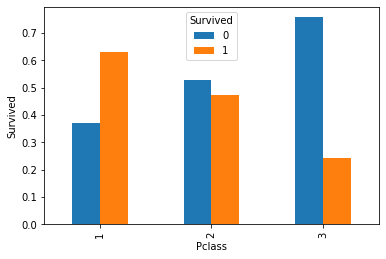

In [71]:
all_three.div(all_three.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Pclass')
plt.ylabel('Survived')

- More people died in class 3, and class 3 had the highest number (491 passengers: 144 women and 347 men), the death could be due to the population size. 

- There is a slight balance with the rate at which people died as to the survival rate in class 2. This class had the lowest population size, yet the ratio of death to survival is leen.

- Class 1 had the highest amount of survival as compared to other classes. 

### There were more passengers between the ages of 20 and 30

In [72]:
freq_table = train_data['Age'].value_counts(bins=8).sort_index()
freq_table

(0.339, 10.368]      64
(10.368, 20.315]    115
(20.315, 30.263]    230
(30.263, 40.21]     155
(40.21, 50.158]      86
(50.158, 60.105]     42
(60.105, 70.052]     17
(70.052, 80.0]        5
Name: Age, dtype: int64

In [73]:
freq = pd.DataFrame(freq_table)
freq

,Age
"(0.339, 10.368]",64
"(10.368, 20.315]",115
"(20.315, 30.263]",230
"(30.263, 40.21]",155
"(40.21, 50.158]",86
"(50.158, 60.105]",42
"(60.105, 70.052]",17
"(70.052, 80.0]",5


In [74]:
freq_dist = ['0-10.2', '10.3-20.2', '20.3-30.2', '30.3-40.2', '40.3-50.2', '50.3-60.2', '60.3-70.2', '70.3-80.2']
total_age = [64,115,230,155,86,42,17,5]
freq_dist = pd.DataFrame(freq_dist)
total_age = pd.DataFrame(total_age)
age_range = pd.concat([freq_dist, total_age], axis=1)
age_range


,0,0
0,0-10.2,64
1,10.3-20.2,115
2,20.3-30.2,230
3,30.3-40.2,155
4,40.3-50.2,86
5,50.3-60.2,42
6,60.3-70.2,17
7,70.3-80.2,5


In [75]:
age_range.columns = ['Age', 'freq_dist']
age_range

,Age,freq_dist
0,0-10.2,64
1,10.3-20.2,115
2,20.3-30.2,230
3,30.3-40.2,155
4,40.3-50.2,86
5,50.3-60.2,42
6,60.3-70.2,17
7,70.3-80.2,5


#### Based on the above analysis, we will be using columns that have more data to lead us into having a better prediction. Age and cabin column would have been a better attribute for our analysis but we do not have enough datasets to use for predictions.

#### We will use all the populated columns and compare the chances with the of survival.

### Loading our test datasets

In [76]:
test_data = pd.read_csv('../input/titanic/test.csv')
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [77]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Combining train and test datasets

In [78]:
traintest_data = [train_data, test_data]

In [79]:
for data in traintest_data:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.')

In [80]:
for data in traintest_data:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [81]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [82]:
train_sex_surv_corr = train_data['Sex'].corr(train_data['Survived'])
train_sex_surv_corr

0.5433513806577555

**Above we can see a better correlation with the Sex of the passenger and the chances of survival.**

In [83]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [84]:
for data in traintest_data:
    age_avg = data['Age'].mean()
    age_std = data['Age'].std()
    no_age_count = data['Age'].isnull().sum()
    
    no_age_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=no_age_count)
    data['Age'][np.isnan(data['Age'])] = no_age_random_list
    data['Age'] = data['Age'].astype(int)
    
train_data['Age Frequency'] = pd.cut(train_data['Age'], 8)

print (train_data[['Age Frequency', 'Survived']].groupby(['Age Frequency'], as_index=False).mean())

   Age Frequency  Survived
0  (-0.08, 10.0]  0.593750
1   (10.0, 20.0]  0.345455
2   (20.0, 30.0]  0.353571
3   (30.0, 40.0]  0.397196
4   (40.0, 50.0]  0.394231
5   (50.0, 60.0]  0.404762
6   (60.0, 70.0]  0.222222
7   (70.0, 80.0]  0.250000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [85]:
for data in traintest_data:
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4

In [86]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Frequency
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,Mrs,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,Mrs,"(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,Mr,"(30.0, 40.0]"


In [87]:
unused_attr = ['Name', 'SibSp', 'Parch', 'Ticket','Fare','Embarked','Title','Cabin']
train_data = train_data.drop(unused_attr, axis=1)
test_data = test_data.drop(unused_attr, axis=1)
train_data = train_data.drop(['PassengerId', 'Age Frequency'], axis=1)

In [88]:
train_data.head()

,Survived,Pclass,Sex,Age
0,0,3,0,1
1,1,1,1,2
2,1,3,1,1
3,1,1,1,2
4,0,3,0,2


In [89]:
test_data.head()

,PassengerId,Pclass,Sex,Age
0,892,3,0,2
1,893,3,1,2
2,894,2,0,3
3,895,3,0,1
4,896,3,1,1


In [90]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 3), (891,), (418, 3))

## Using Logistic Regression

In [91]:
logisticR = LogisticRegression()
logisticR.fit(X_train, y_train)
y_hat = logisticR.predict(X_test)
logR = round( logisticR.score(X_train, y_train) * 100, 2)
print (str(logR) + ' percent')

78.0 percent


In [92]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_hat})
output.to_csv('assessment10.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
